In [2]:
import os
os.environ["http_proxy"] = "http://127.0.0.1:8889"
os.environ["https_proxy"] = "http://127.0.0.1:8889"

In [3]:
import evaluate

/home/dean/miniconda3/envs/llm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
evaluate.list_evaluation_modules(include_community=False, with_details=True)

[{'name': 'precision', 'type': 'metric', 'community': False, 'likes': 2},
 {'name': 'code_eval', 'type': 'metric', 'community': False, 'likes': 11},
 {'name': 'roc_auc', 'type': 'metric', 'community': False, 'likes': 0},
 {'name': 'cuad', 'type': 'metric', 'community': False, 'likes': 0},
 {'name': 'xnli', 'type': 'metric', 'community': False, 'likes': 0},
 {'name': 'rouge', 'type': 'metric', 'community': False, 'likes': 24},
 {'name': 'pearsonr', 'type': 'metric', 'community': False, 'likes': 1},
 {'name': 'mse', 'type': 'metric', 'community': False, 'likes': 0},
 {'name': 'super_glue', 'type': 'metric', 'community': False, 'likes': 4},
 {'name': 'comet', 'type': 'metric', 'community': False, 'likes': 5},
 {'name': 'cer', 'type': 'metric', 'community': False, 'likes': 9},
 {'name': 'sacrebleu', 'type': 'metric', 'community': False, 'likes': 8},
 {'name': 'mahalanobis', 'type': 'metric', 'community': False, 'likes': 0},
 {'name': 'wer', 'type': 'metric', 'community': False, 'likes': 17

In [5]:
accuracy = evaluate.load("accuracy")

In [6]:
print(accuracy.description)


Accuracy is the proportion of correct predictions among the total number of cases processed. It can be computed with:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
 Where:
TP: True positive
TN: True negative
FP: False positive
FN: False negative



In [7]:
print(accuracy.inputs_description)


Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
        {'accuracy': 0.5}

    Example 2-The same as Example 1, except with `normalize` set to `False`.
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> res

In [10]:
accuracy

EvaluationModule(name: "accuracy", module_type: "metric", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
    

## global computation

In [9]:
acc = accuracy.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0], normalize=False)
acc 


{'accuracy': 3.0}

In [10]:
type(acc)

dict

## iteration compution

In [12]:
for ref, pred in zip([0, 1, 0, 1], [1, 0, 0, 1]):
    accuracy.add(reference=ref, prediction=pred)
    
accuracy.compute()

{'accuracy': 0.5}

In [14]:
for ref, pred in zip([[0, 1], [0, 1]], [[1, 0], [0, 1]]):
    accuracy.add_batch(references=ref, predictions=pred)
    
accuracy.compute()

{'accuracy': 0.5}

## multi metrics

In [15]:
clf_metrics = evaluate.combine(["accuracy", "f1", "recall", "precision"])
clf_metrics

In [16]:
eval_res = clf_metrics.compute(references=[0, 1, 0], predictions=[0, 1, 1])

{'accuracy': 0.6666666666666666,
 'f1': 0.6666666666666666,
 'recall': 1.0,
 'precision': 0.5}

## visulaization

In [17]:
from evaluate.visualization import radar_plot

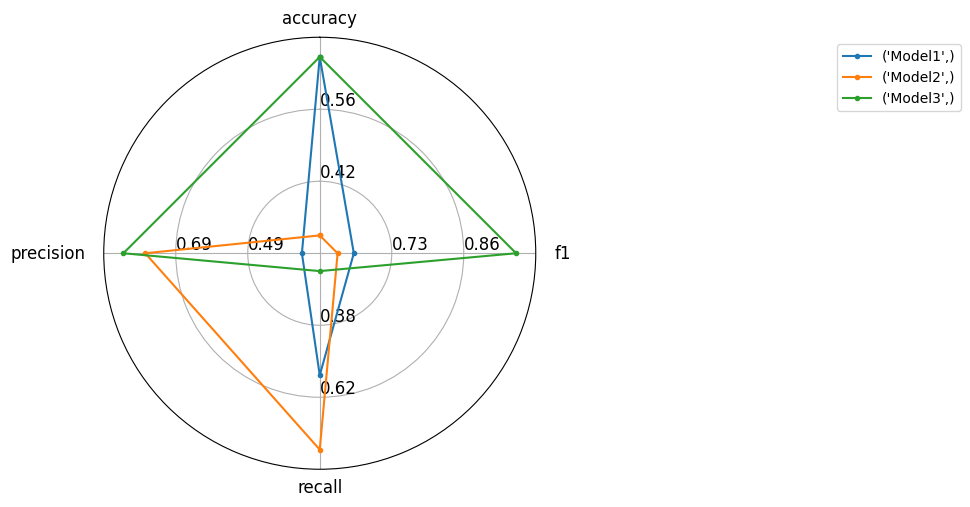

In [18]:
data = [
    {'accuracy': 0.66, 'f1': 0.66, 'recall': 0.55, 'precision': 0.34},
    {'accuracy': 0.32, 'f1': 0.63, 'recall': 0.8, 'precision': 0.77},
    {'accuracy': 0.66, 'f1': 0.96, 'recall': 0.2, 'precision': 0.83}
]

model_names = ["Model1", "Model2", "Model3"]

plot = radar_plot(data, model_names)